# Пакет SURPRISE:

используйте данные MovieLens 1M,
можно использовать любые модели из пакета,
получите RMSE на тестовом сете 0,87 и ниже.

Комментарий преподавателя:
В домашнем задании на датасет 1М может не хватить RAM. Можно сделать на 100K. 
Качество RMSE предлагаю считать на основе Cross-validation (5 фолдов), а не на отложенном датасете

In [53]:
from surprise import KNNWithMeans, KNNBasic, SVD, SVDpp
from surprise import Dataset
from surprise import accuracy
from surprise import Reader
from surprise.model_selection import train_test_split
from surprise.model_selection import cross_validate

import pandas as pd
import matplotlib.pyplot as plt


In [10]:
#Грузим данные, оставляем нужные столбцы, исследуем данные

df = pd.read_csv('ratings.dat', names=['userID', 'movieID', 'rating', 'time'], usecols=['userID', 'movieID', 'rating'], 
                 delimiter='::', engine= 'python')

In [11]:
df.head()

,userID,movieID,rating
0,1,1193,5
1,1,661,3
2,1,914,3
3,1,3408,4
4,1,2355,5


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000209 entries, 0 to 1000208
Data columns (total 3 columns):
 #   Column   Non-Null Count    Dtype
---  ------   --------------    -----
 0   userID   1000209 non-null  int64
 1   movieID  1000209 non-null  int64
 2   rating   1000209 non-null  int64
dtypes: int64(3)
memory usage: 22.9 MB


In [17]:
print(f'users: {df.userID.nunique()}, movies: {df.movieID.nunique()}')

users: 6040, movies: 3706


<BarContainer object of 5 artists>

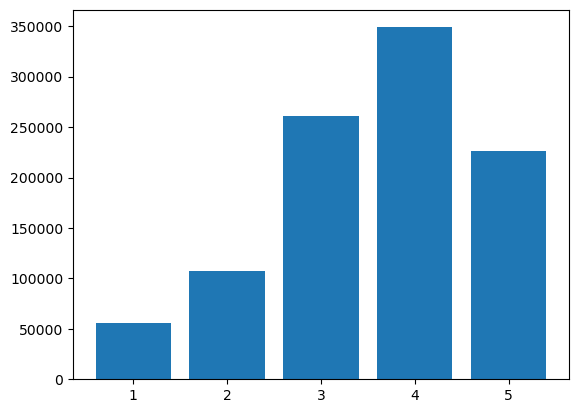

In [24]:
df_ = df.groupby('rating').agg({'userID': 'count'}).reset_index()

plt.bar(df_['rating'], df_['userID'])

# Пробуем разные модели, ищем оптимальную

In [25]:
reader = Reader(rating_scale=(1.0, 5.0))
data = Dataset.load_from_df(df, reader)

In [43]:
model = KNNWithMeans(k=100, sim_options={
    'name': 'pearson_baseline', "shrinkage": 0,
    'user_based': False  # compute  similarities between users
})

In [44]:
cv_res = cross_validate(model, data, measures=['RMSE'], cv=5, verbose=True)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Evaluating RMSE of algorithm KNNWithMeans on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.8776  0.8782  0.8786  0.8803  0.8771  0.8784  0.0011  
Fit time          42.07   53.45   42.88   41.33   41.37   44.22   4.65    
Test time         97.25   98.48   76.43   74.85   74.44   84.29   11.11   


In [47]:
cv_res

{'test_rmse': array([0.87764624, 0.87824173, 0.87862853, 0.88028502, 0.87709518]),
 'fit_time': (42.065141439437866,
  53.448055267333984,
  42.879342794418335,
  41.332430362701416,
  41.36785387992859),
 'test_time': (97.25349283218384,
  98.48187232017517,
  76.43059825897217,
  74.84911823272705,
  74.4364423751831)}

In [48]:
model = KNNBasic(k=50, sim_options={'name': 'pearson_baseline', 'shrinkage': 0, 'user_based': True, 'verbose' : True})

In [49]:
cv_res = cross_validate(model, data, measures=['RMSE'], cv=5, verbose=True)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Evaluating RMSE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9441  0.9434  0.9455  0.9487  0.9459  0.9455  0.0019  
Fit time          91.63   91.47   96.09   99.96   95.78   94.99   3.17    
Test time         116.45  121.45  136.80  129.79  126.99  126.30  6.98    


In [51]:
model = SVD()

In [52]:
cv_res = cross_validate(model, data, measures=['RMSE'], cv=5, verbose=True)

Evaluating RMSE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.8723  0.8746  0.8756  0.8719  0.8721  0.8733  0.0015  
Fit time          10.35   11.77   11.96   10.94   10.79   11.16   0.61    
Test time         2.33    2.46    2.03    2.18    2.07    2.21    0.16    


In [54]:
model = SVDpp()

In [55]:
cv_res = cross_validate(model, data, measures=['RMSE'], cv=5, verbose=True)

Evaluating RMSE of algorithm SVDpp on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.8612  0.8596  0.8641  0.8624  0.8605  0.8616  0.0016  
Fit time          418.37  451.59  422.01  405.47  398.16  419.12  18.38   
Test time         76.91   81.79   72.52   69.66   69.52   74.08   4.69    
